## Parte 1: Selección y Análisis de la Base de Datos

1. **Selección de la Base de Datos**

    Elegí una base de datos de Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) la cual provee información para analizar si los pasajeros de un avión estarán satisfechos o no.
    

In [1]:
import pandas as pd

data = pd.read_csv('pasajeros.csv', delimiter=',', index_col=0)
df = pd.DataFrame(data)

df


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [2]:
print(df.columns)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


Ajustamos los datos para un análisis más detallado, convirtiendo valores complejos del dataframe en simples.

In [3]:
gender = {
    'Male':   0,
    'Female': 1   
}

cus_type = {
    'Loyal Customer':    0, 
    'disloyal Customer': 1   
}

age = {
    (7, 17):  0,
    (17, 27): 1,
    (27, 37): 2,
    (37, 47): 3,
    (47, 57): 4,
    (57, 67): 5,
    (67, 77): 6,
    (77, 86): 7
}


travel_type = {
    'Business travel': 0,  
    'Personal Travel': 1   
}

clasS = {
    'Business': 0,  
    'Eco':      1,
    'Eco Plus': 2
}

flight_dist = {
    (31, 650):    0,
    (650, 1269):  1,
    (1269, 1888): 2,
    (1888, 2507): 3,
    (2507, 3126): 4,
    (3126, 3745): 5,
    (3745, 4364): 6,
    (4364, 4984): 7
}     

'''
'Inflight wifi service'
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location', 
'Food and drink', 
'Online boarding', 
'Seat comfort',
'Inflight entertainment', 
'On-board service', 
'Leg room service',
'Baggage handling', 
'Checkin service', 
'Inflight service',
'Cleanliness'

Son servicios que ya estan calificados con valores del 0 al 5

'''

dep_delay = {        # RETRASO DE DESPEGUE DEL AVION EN MINUTOS
    (0, 20):     0,  # 19' de espera
    (20, 40):    1,  # entre 20' y 39' de espera
    (40, 60):    2,  # entre 40' y 59' de espera
    (60, 120):   3,  # entre 1hr y casi 2hr de espera
    (120, 240):  4,  # entre 2hr y casi 4hr de espera
    (240, 480):  5,  # entre 4hr y casi 8hr de espera
    (480, 720):  6,  # entre 8hr y casi 12hr de espera
    (720, 1129): 7   # entre 12hr y casi 19hr de espera
}

arr_delay = {        # RETRASO DE ATERRIZAJE DEL AVION EN MINUTOS
    (0, 20):     0,  # 19' de espera
    (20, 40):    1,  # entre 20' y 39' de espera
    (40, 60):    2,  # entre 40' y 59' de espera
    (60, 120):   3,  # entre 1hr y casi 2hr de espera
    (556, 694):  4,  # entre 2hr y casi 4hr de espera
    (695, 833):  5,  # entre 4hr y casi 8hr de espera
    (834, 972):  6,  # entre 8hr y casi 12hr de espera
    (973, 1111): 7   # entre 12hr y casi 19hr de espera
}

satisfaction = {
    'satisfied':                1, 
    'neutral or dissatisfied':  0,
    'disatisfied':             -1
}

def reemplazo_dic(valores, rango):
    for rango_dic, group in rango.items():
        if rango_dic[0] <= valores <= rango_dic[1]:
            return group
    return -1

df['Age'] = df['Age'].apply(lambda x: reemplazo_dic(x, age))
df['Flight Distance'] = df['Flight Distance'].apply(lambda x: reemplazo_dic(x, flight_dist))
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].apply(lambda x: reemplazo_dic(x, dep_delay))
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(lambda x: reemplazo_dic(x, arr_delay))

print(df)


          id  Gender      Customer Type  Age   Type of Travel     Class  \
0      19556  Female     Loyal Customer    4  Business travel       Eco   
1      90035  Female     Loyal Customer    2  Business travel  Business   
2      12360    Male  disloyal Customer    1  Business travel       Eco   
3      77959    Male     Loyal Customer    3  Business travel  Business   
4      36875  Female     Loyal Customer    4  Business travel       Eco   
...      ...     ...                ...  ...              ...       ...   
25971  78463    Male  disloyal Customer    2  Business travel  Business   
25972  71167    Male     Loyal Customer    1  Business travel  Business   
25973  37675  Female     Loyal Customer    0  Personal Travel       Eco   
25974  90086    Male     Loyal Customer    0  Business travel  Business   
25975  34799  Female     Loyal Customer    3  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                    0                      5   
1

In [4]:
reemplazo = {
    'Gender':         gender,
    'Customer Type':  cus_type,
    'Type of Travel': travel_type,
    'Class':          clasS,
    'satisfaction':   satisfaction
}

for col, rep in reemplazo.items():
    if col in df.columns:
        df[col] = df[col].replace(rep)
    
df

C:\Users\Urano\AppData\Local\Temp\ipykernel_20804\827568642.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,0,4,0,1,0,5,4,3,...,5,5,5,5,2,5,5,2,2,1
1,90035,1,0,2,0,0,4,1,1,3,...,4,4,4,4,3,4,5,0,0,1
2,12360,0,1,1,0,1,0,2,0,2,...,2,4,1,3,2,2,2,0,0,0
3,77959,0,0,3,0,0,5,0,0,0,...,1,1,1,1,3,1,4,0,0,1
4,36875,1,0,4,0,1,1,2,3,4,...,2,2,2,2,4,2,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,2,0,0,0,3,3,3,...,4,3,2,4,4,5,4,0,0,0
25972,71167,0,0,1,0,0,0,4,4,4,...,4,4,5,5,5,5,4,0,0,1
25973,37675,1,0,0,1,1,1,2,5,1,...,2,4,3,4,5,4,2,0,0,0
25974,90086,0,0,0,0,0,1,3,3,3,...,4,3,2,5,4,5,4,0,0,1


Normalizo el DataFrame

In [5]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']

print("Estadísticas descriptivas del DataFrame normalizado:")
df_n.describe()

Estadísticas descriptivas del DataFrame normalizado:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,...,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04
mean,1.367691e-17,-6.359762e-17,-2.078890e-17,-4.814272e-17,1.723290e-17,1.887413e-17,-3.111497e-17,-7.385530e-18,-1.367691e-17,5.470763e-18,...,-5.812686e-17,-3.152527e-17,-1.159802e-16,-7.973637e-17,5.477602e-17,1.649435e-16,-1.217245e-16,4.068880e-17,-1.203568e-17,-2.930278e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.727892e+00,-1.014249e+00,-4.760305e-01,-1.765356e+00,-6.633657e-01,-9.504175e-01,-8.489200e-01,-2.040421e+00,-1.987003e+00,-1.951076e+00,...,-2.508970e+00,-2.640741e+00,-2.540196e+00,-2.238150e+00,-1.823144e+00,-3.090804e+00,-2.490829e+00,-4.074870e-01,-1.629222e+00,-8.845588e-01
25%,-8.730078e-01,-1.014249e+00,-4.760305e-01,-1.115650e+00,-6.633657e-01,-9.504175e-01,-8.489200e-01,-5.427247e-01,-6.826872e-01,-5.355991e-01,...,-1.014536e+00,-1.080786e+00,-1.023738e+00,-5.382279e-01,-2.475118e-01,-5.498972e-01,-9.749082e-01,-4.074870e-01,-3.562285e-01,-8.845588e-01
50%,8.344304e-03,9.859130e-01,-4.760305e-01,1.837615e-01,-6.633657e-01,6.529106e-01,-2.340542e-01,2.061235e-01,-3.052911e-02,1.721393e-01,...,4.798976e-01,4.791685e-01,4.927206e-01,3.117331e-01,-2.475118e-01,2.970717e-01,-2.169478e-01,-4.074870e-01,-3.562285e-01,-8.845588e-01
75%,8.661864e-01,9.859130e-01,-4.760305e-01,8.334672e-01,1.507406e+00,6.529106e-01,3.808115e-01,9.549718e-01,6.216290e-01,8.798778e-01,...,4.798976e-01,4.791685e-01,4.927206e-01,1.161694e+00,5.403041e-01,1.144041e+00,5.410126e-01,-4.074870e-01,-3.562285e-01,1.130464e+00
max,1.724773e+00,9.859130e-01,2.100625e+00,2.782584e+00,1.507406e+00,2.256239e+00,3.455140e+00,1.703820e+00,1.273787e+00,1.587616e+00,...,1.227115e+00,1.259146e+00,1.250950e+00,1.161694e+00,1.328120e+00,1.144041e+00,1.298973e+00,7.030940e+00,7.281733e+00,1.130464e+00


2. **Estudio de Factibilidad**

    **Volumen de datos**: El conjunto de datos utilizado consta de aproximadamente 26000 registros. Esta cantidad de datos se considera adecuada para el análisis y la modelización debido a que representa adecuadamente a la población objetivo, (considerando la variedad) capturamos diversidad, generando un aumento de la confianza en los resultados obtenidos. Además será posible construir una red mas precisa y generalizable, pudiendo aplicarla a situaciones reales.

    **Correlación de Variables:**

In [6]:
matriz_correlacion = df_n.corr()

print("Matriz de Correlación:")
matriz_correlacion

Matriz de Correlación:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.004371,0.006700,0.011660,-0.006564,-0.105987,0.086148,-0.030303,-0.002502,0.010389,...,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.010520,-0.009635,0.010965
Gender,0.004371,1.000000,0.027878,-0.009328,-0.019930,0.006411,0.006295,0.006323,-0.008417,-0.001703,...,0.005217,0.000423,-0.028051,-0.032202,-0.000079,-0.034890,0.011605,-0.003441,0.004510,-0.007335
Customer Type,0.006700,0.027878,1.000000,-0.301471,-0.307827,0.044415,-0.225722,0.001333,-0.206864,-0.012340,...,-0.090418,-0.044628,-0.042757,0.025470,-0.027565,0.025729,-0.072150,0.009880,0.012005,-0.179632
Age,0.011660,-0.009328,-0.301471,1.000000,-0.020569,-0.112204,0.098147,0.009735,0.035250,0.012463,...,0.070357,0.056021,0.033563,-0.046784,0.026233,-0.054592,0.049670,-0.007699,-0.000256,0.121275
Type of Travel,-0.006564,-0.019930,-0.307827,-0.020569,1.000000,0.485258,-0.264926,-0.109021,0.246425,-0.136350,...,-0.171904,-0.072902,-0.142869,-0.039824,0.014292,-0.027235,-0.106232,-0.012520,-0.011844,-0.453268
Class,-0.105987,0.006411,0.044415,-0.112204,0.485258,1.000000,-0.422584,-0.032293,0.076170,-0.098329,...,-0.199558,-0.222258,-0.204803,-0.176942,-0.158999,-0.161973,-0.144021,0.011763,0.012344,-0.443715
Flight Distance,0.086148,0.006295,-0.225722,0.098147,-0.264926,-0.422584,1.000000,0.004462,-0.014432,0.058904,...,0.137178,0.116328,0.135053,0.068358,0.073745,0.065724,0.105226,-0.004899,-0.008619,0.293362
Inflight wifi service,-0.030303,0.006323,0.001333,0.009735,-0.109021,-0.032293,0.004462,1.000000,0.349137,0.710684,...,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.012750,-0.017035,0.280395
Departure/Arrival time convenient,-0.002502,-0.008417,-0.206864,0.035250,0.246425,0.076170,-0.014432,0.349137,1.000000,0.440230,...,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.001689,-0.000424,-0.064798
Ease of Online booking,0.010389,-0.001703,-0.012340,0.012463,-0.136350,-0.098329,0.058904,0.710684,0.440230,1.000000,...,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.000412,-0.001006,0.157709


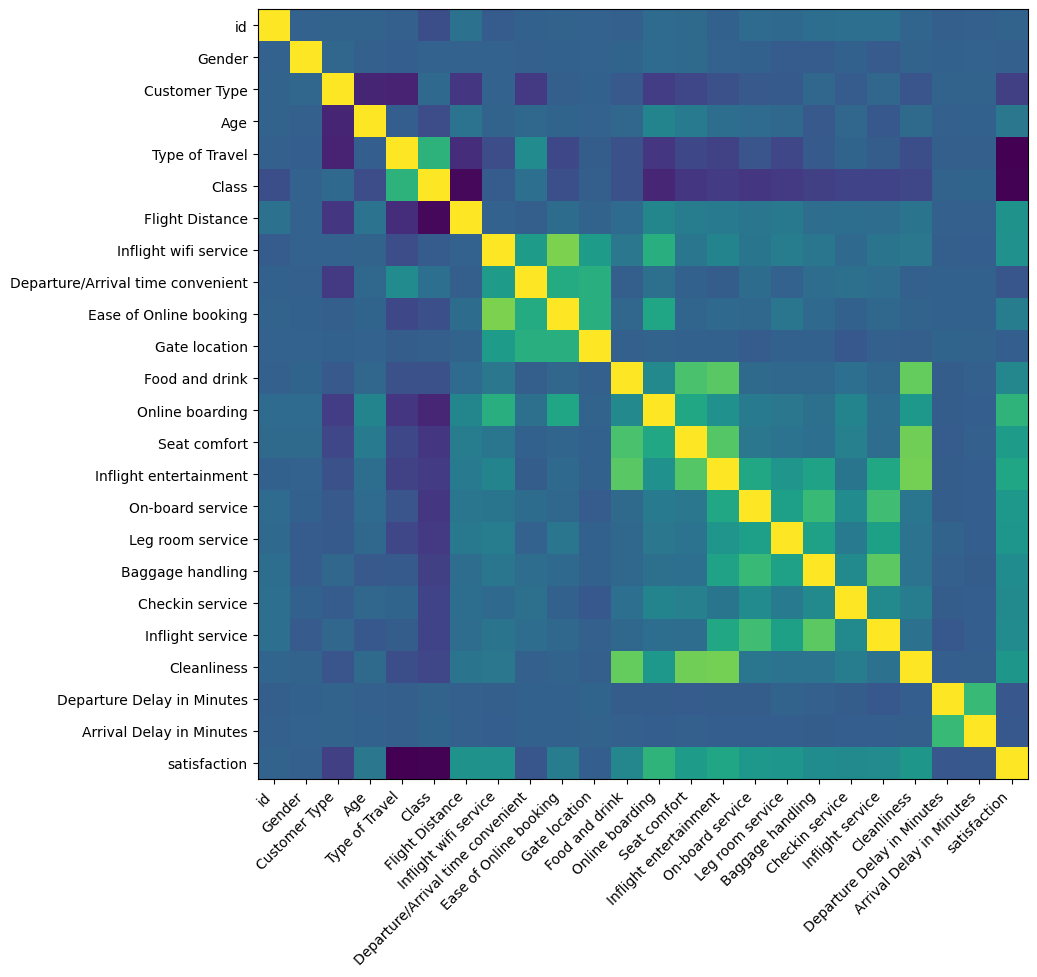

In [9]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df_n.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df_n.columns.to_list(), ha='right');

1. 'Id' y 'Gender' tienen una correlación muy débil con las otras variables del conjunto de datos. Se puede decir que no están relacionados y no voy a tenerlos en cuenta a la hora de realizar la Red.

2. 

. El retraso en la salida y la llegada del avión tiene alta correlación entre sí pero no es relevante observando el resto de los aspectos de la experiencia del cliente.
 

**Deteccion de Valores Atípicos y Mediana**

In [10]:
def atipicos_mediana(column):
    lista_valores = np.array(column)
    orden = sorted(lista_valores)
    medio = int(len(orden)/2) - 1 if len(orden) % 2 == 0 else int(len(orden)/2)
    m = (orden[medio] + orden[medio+1]) / 2 if len(orden) % 2 == 0 else orden[medio]

    q1 = np.percentile(lista_valores, 25)
    q3 = np.percentile(lista_valores, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    a = lista_valores[(lista_valores < lower_bound) | (lista_valores > upper_bound)]
    
    return m, a

for c in df.columns:
    mediana, atipicos = atipicos_mediana(df[c])
    print(f"Columna: {c}")
    print(f"Mediana: {mediana}")
    print(f"Valores atípicos: {atipicos}" if atipicos.any() else "No hay valores atípicos")
    print("\n")

Columna: id
Mediana: 65319.5
No hay valores atípicos


Columna: Gender
Mediana: 1.0
No hay valores atípicos


Columna: Customer Type
Mediana: 0.0
Valores atípicos: [1 1 1 ... 1 1 1]


Columna: Age
Mediana: 3.0
No hay valores atípicos


Columna: Type of Travel
Mediana: 0.0
No hay valores atípicos


Columna: Class
Mediana: 1.0
No hay valores atípicos


Columna: Flight Distance
Mediana: 1.0
Valores atípicos: [6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 7 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6